In [2]:
%pwd

'/Users/admin/Documents/GitHub/GroupWork_Sub2'

In [3]:
%ls

Untitled.ipynb             project_submission2.ipynb


In [4]:
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


# Econometrics - Module 5 - GroupWork - Submission 2

## GARCH model

We start with downloading Apple's daily value from yahoo finance using:

In [10]:
# Install a pip package yfinance in the current Jupyter kernel
import sys
!{sys.executable} -m pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=cf5c175fcb0feeff004318039e478b8ad0bbeb2fb0996a5a973808d6410a11da
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/b4/c3/39/9c01ae2b4726f37024bba5592bec868b47a2fab5a786e8979a
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=efb3ac1d9bb3cea8007bf91f4ae8d8fe26e2ff787b2c9fee422c14afbea5356f
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [24]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as ts
import yfinance as yf

# download APPLE's data from yahoo finance
apple = yf.download('AAPL', start='2015-10-10',end='2020-10-09')

[*********************100%***********************]  1 of 1 completed


In [25]:
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-02,112.889999,115.370003,112.220001,113.019997,113.019997,144712000
2020-10-05,113.910004,116.650002,113.550003,116.500000,116.500000,106243800
2020-10-06,115.699997,116.120003,112.250000,113.160004,113.160004,161498200
2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200


In [31]:
# Calculate daily stock return
apple['Daily Return'] = apple['Adj Close'].pct_change()

In [32]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2015-10-09,27.500000,28.070000,27.372499,28.030001,25.902922,211064400,NaN
2015-10-12,28.182501,28.187500,27.860001,27.900000,25.782785,121868800,-0.004638
2015-10-13,27.705000,28.112499,27.670000,27.947500,25.826679,132197200,0.001702
2015-10-14,27.822500,27.879999,27.389999,27.552500,25.461657,177849600,-0.014134
2015-10-15,27.732500,28.025000,27.622499,27.965000,25.842854,150694000,0.014971


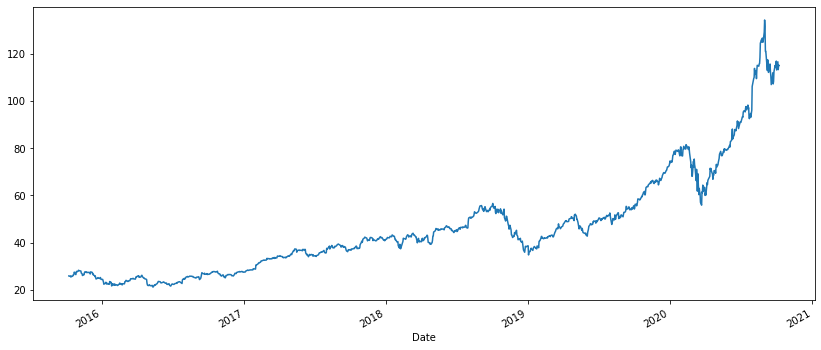

In [14]:
# Show Apple stock price evolution using a plot
apple['Adj Close'].plot(figsize=(14, 6))

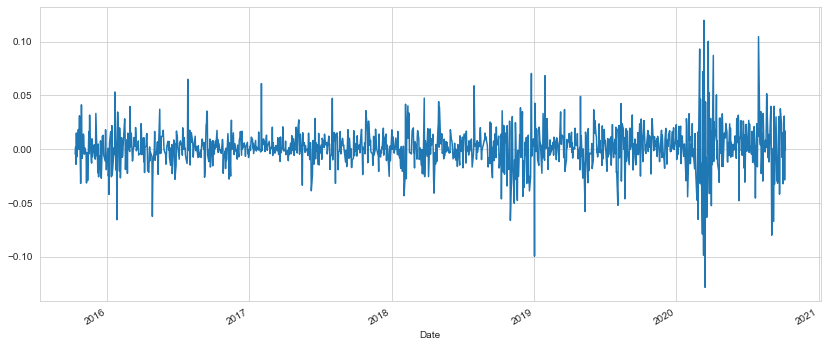

In [20]:
# Show Apple returns evolution using a plot
apple['Daily Return'].plot(figsize=(14, 6))

what we can say from this chart: 

**Persistence:**
1. The process is clearly mean reverting.
2. The process does not have the properties of a unit root process, with or without drift – it has no tendency to wander away from its mean or drift in an upward or downward trend, nor does it have a clear time trend. We therefore conclude it is not difference or trend stationary. 
3. There is clearly some persistence in the series. When it deviates from its long run mean, it takes several periods for the process to return to the mean value.

**Volatility:**
1. The process clearly has a bounded variability.
2. There are clear periods of excessive volatility, followed by periods of relative tranquility. These are characteristics of ARCH/GARCH processes.
3. If later tests confirm statistically significant ARCH/GARCH effects, any encompassing model must allow for these effects to capture all the time series properties of the process.



In [16]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [33]:
# Implement the Augmented Dickey-Fuller Test for checking the existence of a unit root
adf_test = tsa.adfuller(apple['Daily Return'].dropna())
adf_test

(-10.502517229360377,
 1.0748538810490166e-18,
 8,
 1249,
 {'1%': -3.4355964295197743,
  '5%': -2.863856825923603,
  '10%': -2.5680035060041626},
 -6362.421540012419)

**analyze the result**

Since the calculated value of the test statistic (-10.502517229360377) is smaller than any of the critical values at the 1, 5, or 10 percent levels, we can reject the null hypothesis of 𝛾 = 0 and thus we are likely to have found a mean reverting time series.

The daily returns time-series is stationary under the critical values of 10% 

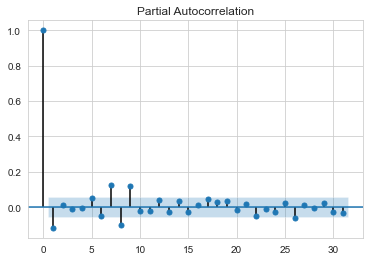

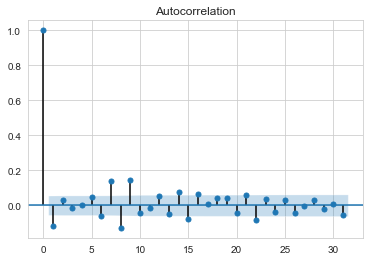

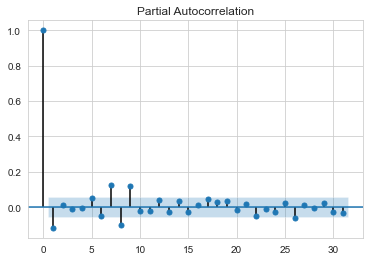

In [46]:
# draw ACF and PACF for returns and returns_squared
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
returns = apple['Daily Return'].dropna()
plot_acf(returns)
plot_pacf(returns)  

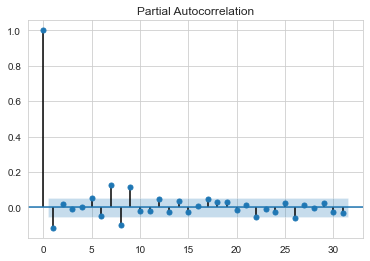

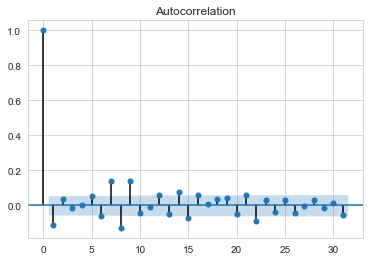

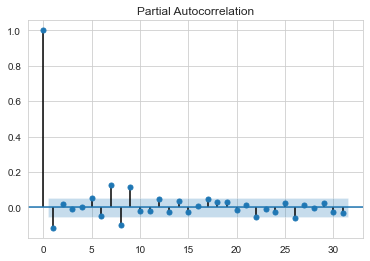

In [47]:
# draw ACF and PACF for returns and returns_squared
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
log_diff = np.log(apple['Adj Close']).diff().dropna()
plot_acf(log_diff)
plot_pacf(log_diff)

**Interpretation :**

Both ACF and PACF look the same, with a potentially significant max lag =9. This points to a ARIMA (p,0,q) model for the level of the returns. 

In [37]:
apple["Daily Return Squared"] = apple['Daily Return']**2


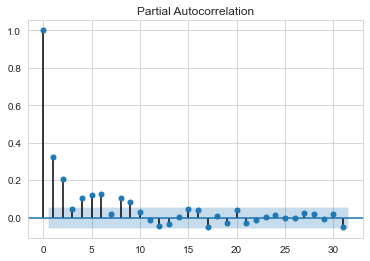

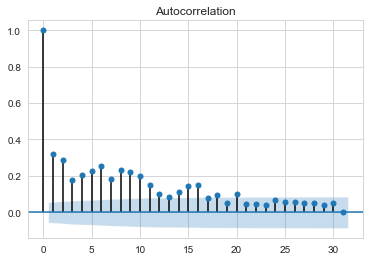

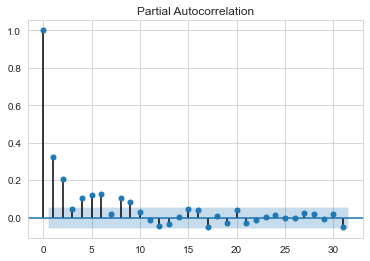

In [38]:
plot_acf(apple['Daily Return Squared'].dropna())
plot_pacf(apple['Daily Return Squared'].dropna())